# Entrega 1 - Aprendiz de damas chinas

### Grupo 13:
     - J. Aguirre  C.I: 4.773.509-6
     - A. Collazo C.I: 4.455.617-4
     - G. Núnez C.I: 4.785.081-2



## 1. Objetivo

El principal objetivo de esta tarea es construir un jugador que aprenda a jugar a las damas chinas siguendo los lineamientos expuestos en el capítulo 1 del libro del curso.
    
El éxito del aprendizaje se medirá a través de la cantidad de partidas ganadas sobre un total de partidas jugadas previamente configurado.
    
El conjunto de entrenamiento será el resultado de las partidas jugadas ante dos tipos de adversarios: un jugador aleatorio, y un jugador que conforma una versión anterior del propio aprendiz.
   
Para valorar el aprendizaje se definirá una función objetivo cuyo resultado será un valor numérico que será más alto para aquellos tableros que sean más promisorios. Dicha función estará implementada a partir de una representación del tablero convenientemente elegida, a los efectos de aprender a jugar y conseguir mayor porcentaje de victorias a través de la experiencia.

En el presente informe se describirá la solución implementada, los resultados intermedios obtenidos y se explicará el por qué de los mismos.


## 2. Diseño

En la siguiente sección se mencionan las decisiones de diseño utilizadas en los distintos aspectos del juego, la representación lógica del tablero, los algoritmos utilizados para la implementación del aprendiz y la construcción de los jugadores oponentes.  

In [1]:
%%latex
\begin{equation*}
    f(<t_0,t_1,...,t_{10}>) = \begin{cases}
               1              & t_1 = 10\\
               -1               & t_2 = 10\\
               \sum t_i * w_i & \text{sino}
           \end{cases}
\end{equation*}

<IPython.core.display.Latex object>

# ## 2.1 Juego
### 2.1.1 Reglas
Las reglas utilizadas para el juego son las mismas que se aplican en el juego de las damas chinas convencional a excepción de las siguientes simplificaciones:
* Dado que las partidas son siempre de dos jugadores el tablero fue simplificado, omitiendo cuatro de las seis puntas de la estrella. Por lo tanto el tablero resultante está formado por un hexágono de nueve casilleros de largo, y dos triángulos opuestos, de largo cuatro casilleros cada uno.
* Una vez que una ficha alcanza su triángulo objetivo, la misma no podrá realizar movimientos hacia atrás en el tablero. Esta decisión fue tomada para que el jugador randómico no saque fichas de las posiciones ganadoras.
* Se limita a poder realizar un único salto por jugada, ya que no se consideró como una casuística a suceder a menudo.
* Se define un número máximo de jugadas realizadas por ambos jugadores durante todo el partido. En caso de que el jugador aprendiz no sea capaz de vencer a su oponente en menos de diez mil jugadas, el partido será computado como perdido para el jugador aprendiz si éste tiene menos de 5 fichas en posición ganadoras. De lo contrario será computado como ganador para el jugador aprendiz.
* En el caso de atascamiento (situación que se da cuando un jugador tiene fichas en el triángulo ganador y su contrincante aún no saco las fichas que están en el nivel superior de su triángulo), se desechará la partida del conjunto de aprendizaje.

## 2.2 Tablero
Con el objetivo de contabilizar el grado de avance de las fichas (de cada jugador), el tablero fue particionado en cinco regiones lógicas: las fichas en posición inicial, en posición lejana del triángulo objetivo, las que están a mitad de camino, las cercanas al triángulo objetivo y finalmente las fichas en posición ganadora. Todas las regiones son de largo tres casilleros a excepción de la primer y última región que tienen largo cuatro cada una.
A partir de esto, se define la representación del tablero como una tupla de diez valores, donde cada valor representa la cantidad de fichas de cada jugador en: (región inicial, región lejana, región media, región cercana, región ganadora).

En las figuras 2.1 y 2.2 se muestran dos ejemplos de posibles tableros con sus respectivas tuplas que los representan. (PONER IMAGENES DE TABLEROS CON FICHAS EN DISTINTAS POSICIONES Y LA TUPLA CORRESPONDIENTE A ESA SITUACION) 



## 2.3 Algoritmo
La función de valoración es una función partida en tres rangos:
\begin{equation*}
    f(<t_0,t_1,...,t_{10}>) = \begin{cases}
               1              & t_1 = 10\\
               -1               & t_2 = 10\\
               \sum t_i * w_i & \text{sino}
           \end{cases}
\end{equation*}

Cada una de las variables está multiplicada por una ponderación que representa la relevancia del valor del atributo en la estrategia de juego.
El dominio de la función de valoración está definida en todos los reales entre -1 y 1.

Los función se ajusta siguiendo el algoritmo LMS al término de una cantidad de partidas dada. Dicha cantidad de partidos es configurable al inicio del entrenamiento. El vector de pesos obtenido es normalizdo de manera tal que el valor de cada uno de ellos se mantiene en el rango entre -1 y 1.
En la sección 3.1 se tabulan los resultados obtenidos ajustando la función de valoración cada 1, 10, 100 y 1.000 partidos jugados.

El ajuste de los pesos está afectado por una factor de aprendizaje ($\mu$).
Dicho factor de aprendizaje se ajusta según el resultado del partido, de la forma que sigue: \begin{equation*}
    f(win) = \begin{cases}
               0.0000001              & win = 1\\
               0.0001               & \text{sino}
             \end{cases}
\end{equation*}

En caso de obtener una partida ganadora, el ajuste del aprendizaje se enfriará, ya que está cumpliendo el objetivo.

## 2.4 Contrarios
Se definen dos tipos de jugadores oponentes:
* Un jugador que elige sus movimientos al azar
* Un jugador que constituye una versión previa del jugador aprendiz actual.

### 2.4.1 Jugador azaroso
Las jugadas se eligen de forma aleatoria sobre un subconjunto de jugadas válidas para cierta ficha (elegida también de forma aleatoria). Como se mencionó anteriormente, una vez que una ficha alcanza la región ganadora se limita a que únicamente avance (en caso de ser posible) para llenar el triángulo del adversario e impedir que retire las fichas de dicha región.
En caso de que no haya movimiento disponible para la ficha elegida, se selecciona otra elegida nuevamente al azar (notar que eventualmente podría llegar a ser la misma).

### 2.4.2 Versión previa del aprendiz actual
En esta instancia el contrincante utiliza como pesos iniciales a los penultimos pesos configurados por el aprendiz, mientras que el mismo utilizará los pesos que obtuvo al terminar la última partida de entrenamiento ante el oponente aleatorio. Luego tanto el jugador aprendiz (algoritmo LMS) como su contrincante (vector anterior), actualizan los pesos conforme al parámetro de ajuste mencionado anteriormente.


## 3. Experimentación

Criterios de entrenamiento:

En los casos de prueba con pocos partidos jugados los resultados 

### 3.1 Fase de entrenamiento vs. el jugador azaroso

<table>
  <tr>
    <th>Total de partidos jugados</th>
    <th>Frecuencia de ajuste</th>
    <th>Partidos ganados</th>
    <th>Partidos perdidos</th>  
  </tr>
  <tr>
    <td>1.000</td>
    <td>10</td>
    <td>364</td>
    <td>0</td>
  </tr>    
  <tr>
    <td>1.000</td>
    <td>50</td>
    <td>405</td>
    <td>0</td>
  </tr>
  <tr>
    <td>1.000</td>
    <td>100</td>
    <td>403</td>
    <td>0</td>
  </tr>
  <tr style="font-weight:bold">
    <td>1.000</td>
    <td>250</td>
    <td>413</td>
    <td>0</td>
  </tr>   
    <caption>Tabla 1.1 - Entrenamiento del aprendiz ante el jugador aleatorio partiendo siempe desde los mismos pesos iniciales, variando la frecuencia de ajuste para una cantidad total de partidos fija.</caption>
</table>

Para este caso de prueba, los mejores resultados ocurrieron en el último caso, cuando transcurre mayor cantidad de partidos jugados antes de actualizar los pesos. 

<table>
  <tr>
    <th>Total de partidos jugados</th>
    <th>Frecuencia de ajuste</th>
    <th>Partidos ganados</th>
    <th>Partidos perdidos</th>
    <th>Porcentaje de partidos ganados</th>
  </tr>
  <tr>
    <td>10</td>
    <td>1</td>
    <td>4</td>
    <td>0</td>
    <td>40%</td>  
  </tr>    
  <tr>
    <td>100</td>
    <td>10</td>
    <td>39</td>
    <td>0</td>
    <td>39%</td>  
  </tr>
  <tr style="font-weight:bold">
    <td>1.000</td>
    <td>100</td>
    <td>403</td>
    <td>0</td>
    <td>40.3%</td>  
  </tr>
  <tr>
    <td>10.000</td>
    <td>1000</td>
    <td>3.862</td>
    <td>0</td>
    <td>38.62%</td>  
  </tr>
  <tr>
    <td>100.000</td>
    <td>10.000</td>
    <td>38.616</td>
    <td>0</td>
    <td>38.61%</td>
  </tr>   
    <caption>Tabla 1.2 - Entrenamiento del aprendiz ante el jugador aleatorio partiendo siempe desde los mismos pesos iniciales.</caption>
</table>

Aquí se puede ver que la cantidad de partidos ganados no tiene grandes variaciones a medida que se aumenta la cantidad de partidos jugados. Notar que la frecuencia de ajuste de los pesos se mantiene proporcional en todos los casos.

En conclusión, a partir de los resultados obtenidos puede detectarse que no hay una mejora a traves de la experiencia, es decir que una mayor cantidad de partidas jugadas no refleja una mayor cantidad de partidas ganadas(proporcionalmente). Por lo tanto hay errores inherentes al modelo, o no se cumple alguna hipotesis (puntos que se desarrollan en la sección 4).


### 3.2 Fase de entrenamiento vs. la versión previa del aprendiz actual

<table>
  <tr>
    <th>Total de partidos jugados</th>
    <th>Frecuencia de ajuste</th>
    <th>Partidos ganados</th>
    <th>Partidos perdidos</th>  
  </tr>
  <tr style="font-weight:bold">
    <td>100</td>
    <td>1</td>
    <td>47</td>
    <td>27</td>
  </tr>    
  <tr>
    <td>100</td>
    <td>2</td>
    <td>32</td>
    <td>34</td>
  </tr>
  <tr>
    <td>100</td>
    <td>10</td>
    <td>37</td>
    <td>25</td>
  </tr>
  <tr>
    <td>100</td>
    <td>25</td>
    <td>28</td>
    <td>37</td>
  </tr>   
    <caption>Tabla 2.1 - Entrenamiento del aprendiz ante la versión previa partiendo desde los pesos iniciales obtenidos en el mejor resultado del entrenamiento anterior, variando la frecuencia de ajuste para una cantidad total de partidos fija.</caption>
</table>

En este caso, los mejores resultados se obtienen cuando los jugadores ajustan sus pesos al final de cada partido. En comparación con el mismo experimento realizado con el jugador aleatorio, la proporción de la frecuencia de ajuste es la misma. La diferencia está en la cantidad total de partidos jugados. Para este caso se redujo el total de partidos ya que para una cantidad mayor a 100 los jugadores se estancan.

<table>
  <tr>
    <th>Total de partidos jugados</th>
    <th>Frecuencia de ajuste</th>
    <th>Partidos ganados</th>
    <th>Partidos perdidos</th>
    <th>Porcentaje de partidos ganados</th>
  </tr>
  <tr>
    <td>10</td>
    <td>1</td>
    <td>4</td>
    <td>3</td>
    <td>40%</td>  
  </tr>    
  <tr style="font-weight:bold">
    <td>100</td>
    <td>10</td>
    <td>37</td>
    <td>25</td>
    <td>37%</td>  
  </tr>
  <tr>
    <td>1.000</td>
    <td>100</td>
    <td>35</td>
    <td>32</td>
    <td>-</td>  
  </tr>
  <tr>
    <td>10.000</td>
    <td>1000</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>  
  </tr>
  <tr>
    <td>100.000</td>
    <td>10.000</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
  </tr>   
    <caption>Tabla 2.2 - Entrenamiento del aprendiz ante la versión partiendo desde los pesos iniciales obtenidos en el mejor resultado del entrenamiento anterior.</caption>
</table>

HABLAR DE QUE SE EMPIEZA A TRANCAR LUEGO DE LOS 100 PARTIDOS. 
AGREGAR QUE SE PROBÓ CON OTROS PESOS INICIALES Y QUE EL RESULTADO MEJORA UN POCO PERO DESPUÉS DE 500 PARTIDOS SE VUELVE A TRANCAR. EXPLICAR POR QUE PASA ESTO (AJUSTA LOS PESOS BIEN AL PRINCIPIO PERO LUEGO DESAPRENDE).

### 3.3 Competencia entre los jugadores obtenidos durante las fases de entrenamiento

<table>
  <tr>
    <th>Total de partidos jugados</th>
    <th>Ganados por jugador entrenado vs. aleatorio</th>
    <th>Ganados por jugador entrenado vs. versión previa</th>
  </tr>
  <tr>
    <td>100</td>
    <td>34</td>
    <td>38</td> 
  </tr>    
  <tr style="font-weight:bold">
    <td>100</td>
    <td>33</td>
    <td>38</td> 
  </tr>
  <tr style="font-weight:bold">
    <td>100</td>
    <td>35</td>
    <td>31</td> 
  </tr>
  <tr>
    <td>100</td>
    <td>33</td>
    <td>33</td> 
  </tr>
  <tr>
    <td>100</td>
    <td>33</td>
    <td>32</td> 
  </tr>  
    <caption>Tabla 3.1 - Resultados de la competencia entre los jugadores obtenidos con cada entrenamiento .</caption>
</table>



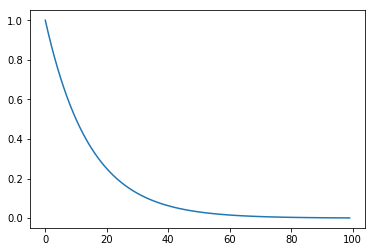

In [4]:
import matplotlib.pyplot
matplotlib.pyplot.plot(range(0,100), [2**-(x/10) for x in range(0,100)])


- Debe existir alguna instancia donde se compile la información relevante de los experimentos de forma de poder comparar fácilmente los distintos experimentos. Por ejemplo:

_En la tabla 1, se presentan los distintos resultados contra el jugador aleatorio, para los distintos valores de $\alpha$ elegidos. El mejor resultado se obtiene para $\alpha=0.05$, lo que prueba que la estrategia..._

## 4. Conclusión

Una breve conclusión del trabajo realizado. Por ejemplo: 

Culminadas las etapas del desarrollo del modelo y experimentación, puede concluirse que no se logró el objetivo de implementar un aprendiz 'competente', dado que no pudo canalizarse el aprendizaje a traves de la experiencia.

En el desarrollo del modelo, las elecciones con respecto al tablero tienen las siguientes limitantes:


Durante la fase de entrenamiento frente al jugador aleatorio, los resultados en general son buenos, dado que en todos los casos de prueba el jugador logra el cometido de incrementar la cantidad de partidos ganados a raíz de su experiencia.

Los resultados obtenidos frente a la verión previa los resultados no son los esperados. Aquí se ve que el aprendizaje se frena bastante. Esto se debe a limitaciones asociadas al modelo propuesto e hipotesis que no se cumplen:
* Dividir el tablero en segmentos de cercanía no fue provechoso, ya que se incurre en situaciones en las que al no cambiar de conjunto no hay retibución al avance, por lo que la ponderacion de adelantar o atrasar una ficha (dentro del mismo rango) es igual.
* La tupla elegida para representar el tablero contiene información relativa al jugador contrario, pero no se toman acciones que limiten su juego como el bloquearlo (AUNQUE SE HIZO UNA PRUEBA DE CONCEPTO, ACERCA DE GUARDAR SOLAMENTE INFORMACION DE P1, PERO SIN RESULTADO FAVORABLE. 
* El aprendizaje inicial comienza su entrenamiento frente a un jugador aleatorio, por lo que la hipótesis de que en todo momento realizará el mejor movimiento posible no es válida, lo que puede llevar a condicionar la forma de jugar del jugador aprendiz. 

Sin embargo, futuras mejorías pueden guiar hacia mejores resultados:
* Computar n jugadas siguientes de la instancia actual, de manera de evaluar un mayor conjunto de posibilidades (propias y del rival) asumiendo el costo computacional que conlleva.
* Cambiar las regiones de distancia por la distancia propiamente dicha.
* Considerar la posibilidad de bloquear las fichas del oponente.
* Favorecer la estrategia de ataque utilizando saltos de largo mayor que 1.
* Cambiar el contrincante puramente aleatorio, por uno con un criterio estatico de decisión, que genere mejores datos de entrada, es decir que compita frente a una estrategia (macro) como puede ser: intentar avanzar siempre, intentar generar bloqueos, otras.

- ¿encuentra alguna relación con los parámetros / oponentes/ atributos elegidos?
